# Bangalore Housing Price Prediction

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [3]:
#Reading the data

housing = pd.read_csv("Bengaluru_House_Data.csv")
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [74]:
#Checking the features in the dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


##### There are 13320 samples and 9 features. There are few features with missing values.

#### Univariate Analysis

<Axes: xlabel='area_type', ylabel='count'>

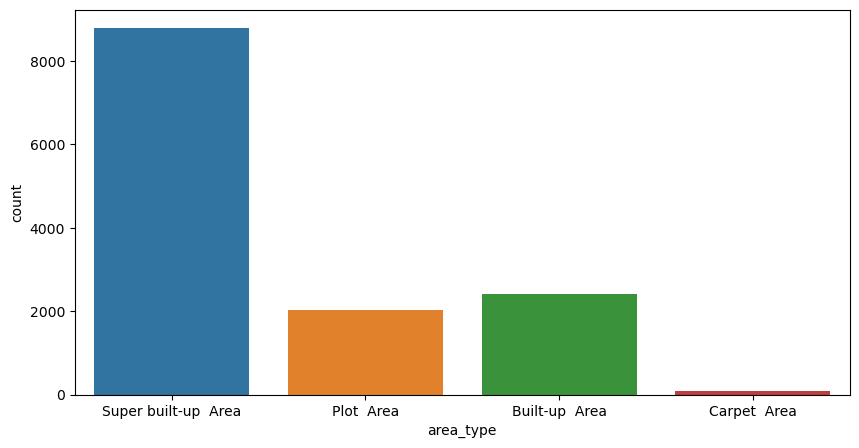

In [75]:
sns.countplot(x="area_type", data = housing)

In [76]:
housing["availability"].value_counts()

availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Possession       16
20-Aug                     16
19-Oct                     15
21-Mar                     14
17-Jun                     

##### The feature can be labelled as "Ready to Move" or "To be Vacated"

In [77]:
housing["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

##### We can drop "location" feature 

In [78]:
housing["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

##### We can relabel them to have only numberical data

In [79]:
housing["society"].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

##### We can drop "society" feature 

In [80]:
housing["total_sqft"].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

<Axes: xlabel='bath', ylabel='Count'>

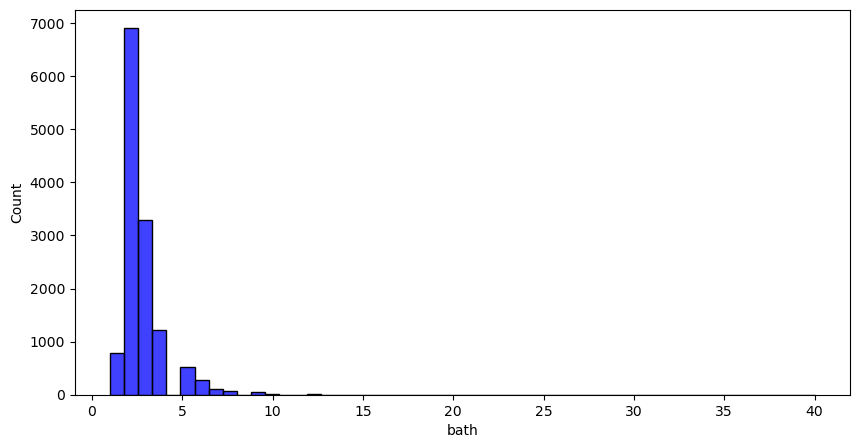

In [84]:
sns.histplot(housing["bath"], kde=False, bins=50, color='blue', edgecolor='black')

In [85]:
housing["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

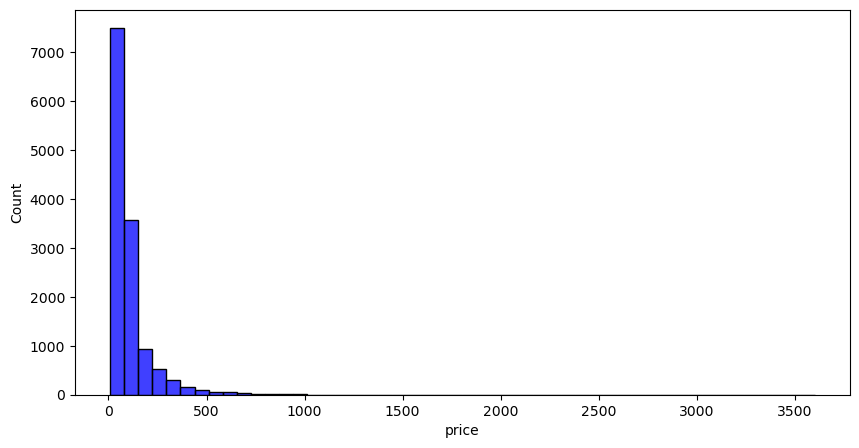

In [86]:
sns.histplot(housing["price"], kde=False, bins=50, color='blue', edgecolor='black')

#### Handling Missing Values

In [87]:
housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [88]:
housing_clean = housing.copy()

In [89]:
housing_clean[pd.isnull(housing_clean["size"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [90]:
# Dropping samples with 3 or more missing records
# thresh => row has at least 7 features not null will not be deleted
housing_clean.dropna(axis=0, thresh = 7, inplace = True)

In [91]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [92]:
housing_clean[pd.isnull(housing_clean["location"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [93]:
housing_clean[housing_clean["society"] == "Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [94]:
housing_clean["location"] =  housing_clean["location"].replace(to_replace = np.nan, value = "Anantapura")

In [95]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [96]:
housing_clean["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [97]:
#Adding the "bhk" feature extracted from size

housing_clean["bhk"] = housing_clean["size"].apply(lambda x: int(x.split(" ")[0]))

In [98]:
housing_clean[pd.isnull(housing_clean["bath"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,4
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820,3
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530,1
669,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400 - 6640,NaN,NaN,375.000,5
702,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400 - 6800,NaN,NaN,548.500,5
801,Super built-up Area,18-Dec,JP Nagar,4 BHK,Pehtsa,4000 - 5249,NaN,NaN,453.000,4
941,Super built-up Area,Ready To Move,Whitefield,4 Bedroom,PrOakSi,3606 - 5091,NaN,NaN,304.000,4
1264,Built-up Area,18-May,Hennur,3 Bedroom,Asoilul,2264,NaN,NaN,155.000,3
1267,Super built-up Area,18-Jun,Yelahanka,3 BHK,Shalkri,1440 - 1884,NaN,NaN,67.980,3


In [99]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

housing_clean[~housing_clean["total_sqft"].apply(fcnIsFloat)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770,2


In [100]:
metrics = []

def fcnConvertToSqFt(x, metric):
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

def fcnExtractTotalSqft(x):
    try:
        values = x.split("-")
        return np.mean(list(map(float, values))) # nếu có dấu - thì lấy mean
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if fcnIsFloat(x[0:intIndex]):
                    return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])

In [101]:
housing_clean["sqft"] = housing_clean["total_sqft"].apply(fcnExtractTotalSqft) # cột mới với sqft có chung đơn vị đo lường

In [102]:
housing_clean["sqft"].describe()

count    1.330400e+04
mean     1.911209e+03
std      1.728725e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.276000e+03
75%      1.680000e+03
max      1.306800e+06
Name: sqft, dtype: float64

##### There are some outliers in this feature

In [103]:
housing_clean.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1200.0


In [104]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
bhk                0
sqft               0
dtype: int64

In [105]:
bhk_groupby_bathroom = housing_clean.groupby("bhk")["bath"].value_counts() # phân bath theo bhk ( bhk là key )

In [106]:
# nếu
def fcnFillBathrooms(bhk_groupby_bathroom, row):
    if pd.isnull(row["bath"]):
        # ví dụ có 1 căn hộ 2 phòng ngủ và 1 nhà vệ sinh, xong vào đây có căn hộ 2 phòng ngủ và NaN nvs => nó sẽ lấy 1 điền vào
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        # ko thì sẽ trả về số nhà tắm hiện tại
        return int(row["bath"])

In [107]:
# nhóm lại 1 lần nữa
bhk_groupby_bathroom = housing_clean.groupby("bhk")["bath"].value_counts()
# tạo 1 cột bath
housing_clean["bath"] = housing_clean.apply(lambda row: fcnFillBathrooms(bhk_groupby_bathroom, row), axis=1)

In [108]:
def fcnFillBalcony(bhk_groupby_balcony, row):
    if pd.isnull(row["balcony"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["balcony"])

In [109]:
bhk_groupby_balcony = housing_clean.groupby("bhk")["balcony"].value_counts()
housing_clean["balcony"] = housing_clean.apply(lambda row: fcnFillBalcony(bhk_groupby_balcony, row), axis=1)

##### Handled all the missing values based on highest frequency

In [110]:
# society NaN nhìu, size = bhk, total_sqft = sqft
housing_clean.drop(["society", "size", "total_sqft"], inplace = True, axis=1)

##### Dropping the redundant features

In [111]:
housing_clean.isnull().sum()

area_type       0
availability    0
location        0
bath            0
balcony         0
price           0
bhk             0
sqft            0
dtype: int64

In [112]:
housing_clean.head()

,area_type,availability,location,bath,balcony,price,bhk,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5,3,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2,3,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,1,51.00,2,1200.0


In [113]:
# xử lí cột availabilily, nếu có ngày tháng rời đi thì sẽ thay bằng "Soon to be Vacated"
def fcnRelabelAvailability(x):
    values = x.split("-")
    try:
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            return x
    except:
            return ""

In [114]:
# overwrite cot availability sau khi da xu li
housing_clean["availability"] = housing_clean["availability"].apply(fcnRelabelAvailability)

##### Categorized the feature into 2 buckets

In [115]:
# loại bỏ khoảng trắng ở đầu và ở cuối
housing_clean["location"] = housing_clean["location"].apply(lambda x: x.strip())

In [116]:
# đếm số căn hộ ở mỗi nơi, sắp xếp giảm dần
unique_location_count = housing_clean.groupby("location")["location"].agg("count").sort_values(ascending = False)
unique_location_count

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [117]:
# lọc trong unique, chứa số lượng xuất hiện <=10
unique_location_count_10 = unique_location_count[unique_location_count <= 10]

In [118]:
# những nơi xuất hiện <= 10 sẽ thay bằng "Other" còn lại giữ nguyên
housing_clean["location"] = housing_clean["location"].apply(lambda x : "Other" if x in unique_location_count_10 else x)

In [119]:
# đếm lại giá trị duy nhất của location
housing_clean["location"].nunique()

242

##### Relabelled few locations as Others whose count was less than 10

In [120]:
# giá trên từng sqft
housing_clean["price_per_sqft"] = housing_clean["price"] * 100000 / housing_clean["sqft"]

In [121]:
# diện tích trung bình mỗi phòng ngủ trong căn hộ.
housing_clean["sqft_per_bhk"] = housing_clean["sqft"] / housing_clean["bhk"] 

In [122]:
housing_clean.head()

,area_type,availability,location,bath,balcony,price,bhk,sqft,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,2,1,39.07,2,1056.0,3699.810606,528.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5,3,120.00,4,2600.0,4615.384615,650.0
2,Built-up Area,Ready To Move,Uttarahalli,2,3,62.00,3,1440.0,4305.555556,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1,95.00,3,1521.0,6245.890861,507.0
4,Super built-up Area,Ready To Move,Kothanur,2,1,51.00,2,1200.0,4250.000000,600.0


##### Added a feature "price_per_sqft" and "sqft_per_bhk" that can help detect outliers

#### Outlier Analysis

In [123]:
# Removing samples that show sqft_per_room to be less than 300 and more than 1500 as it looks like an outlier when kde is analyzed

housing_clean[housing_clean["sqft_per_bhk"] < 300].count()

area_type         748
availability      748
location          748
bath              748
balcony           748
price             748
bhk               748
sqft              748
price_per_sqft    748
sqft_per_bhk      748
dtype: int64

In [124]:
housing_clean[housing_clean["sqft_per_bhk"] > 1500].count()

area_type         104
availability      104
location          104
bath              104
balcony           104
price             104
bhk               104
sqft              104
price_per_sqft    104
sqft_per_bhk      104
dtype: int64

In [125]:
# lọc tiếp từ 300 <= x <= 1200
housing_clean = housing_clean[~(housing_clean["sqft_per_bhk"] < 300)]
housing_clean = housing_clean[~(housing_clean["sqft_per_bhk"] > 1200)]

<Axes: xlabel='sqft_per_bhk', ylabel='Count'>

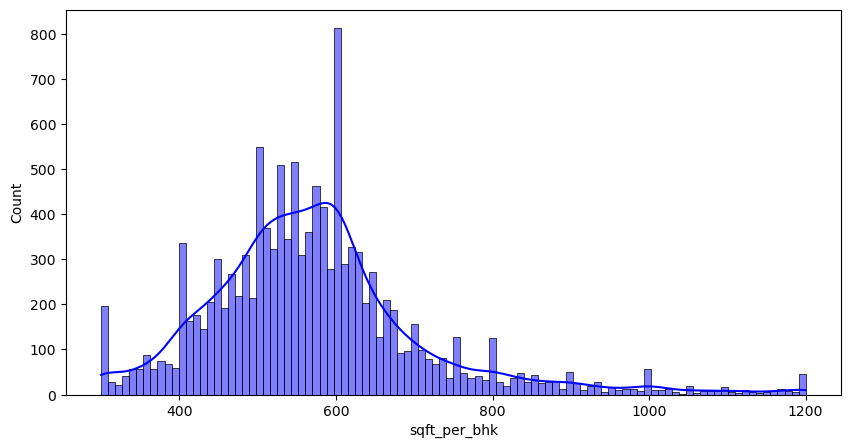

In [126]:
sns.histplot(housing_clean["sqft_per_bhk"], kde=True, bins=100, color='blue', edgecolor='black')

In [127]:
# "sqft" lớn hơn 6000 được loại bỏ.
housing_clean = housing_clean[~(housing_clean["sqft"] > 6000)]

<Axes: xlabel='sqft', ylabel='Count'>

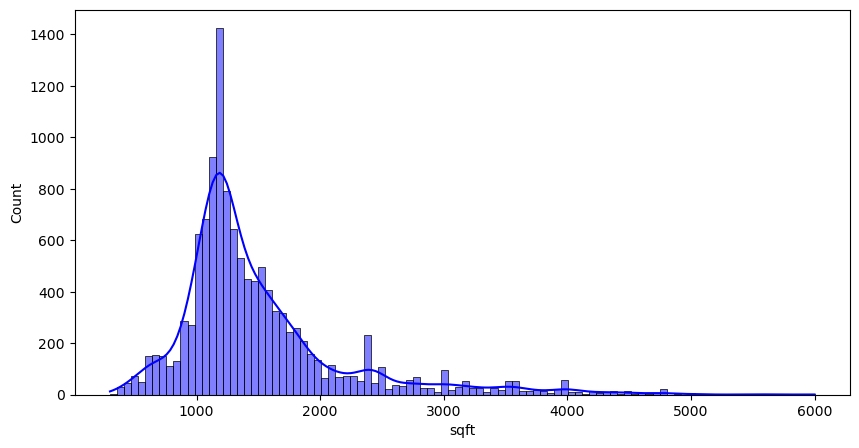

In [128]:
sns.histplot(housing_clean["sqft"], kde=True, bins=100, color='blue', edgecolor='black')

<Axes: xlabel='price_per_sqft', ylabel='Count'>

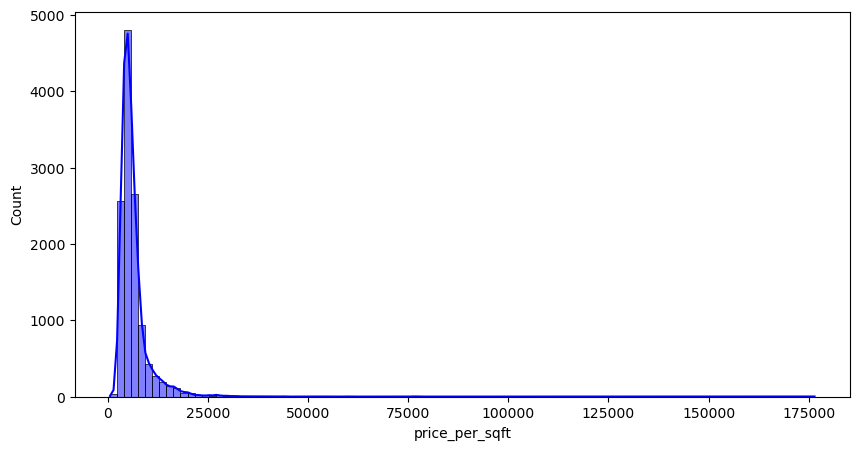

In [129]:
sns.histplot(housing_clean["price_per_sqft"], kde=True, bins=100, color='blue', edgecolor='black')

In [130]:
# sắp price từ cao đến thấp
housing_clean.sort_values(["price"], ascending=False) 

,area_type,availability,location,bath,balcony,price,bhk,sqft,price_per_sqft,sqft_per_bhk
12443,Plot Area,Ready To Move,Other,8,4,2600.0,4,4350.0,59770.114943,1087.5
6421,Plot Area,Soon to be Vacated,Bommenahalli,3,2,2250.0,4,2940.0,76530.612245,735.0
8398,Super built-up Area,Ready To Move,Bannerghatta Road,4,5,1400.0,5,2500.0,56000.000000,500.0
9535,Plot Area,Ready To Move,Indira Nagar,5,4,1250.0,4,2400.0,52083.333333,600.0
1299,Plot Area,Ready To Move,Chamrajpet,7,1,1200.0,9,4050.0,29629.629630,450.0
...,...,...,...,...,...,...,...,...,...,...
5410,Super built-up Area,Ready To Move,Attibele,1,1,10.0,1,400.0,2500.000000,400.0
11091,Built-up Area,Ready To Move,Attibele,1,1,10.0,1,410.0,2439.024390,410.0
7482,Super built-up Area,Ready To Move,Other,2,1,10.0,1,470.0,2127.659574,470.0
12579,Super built-up Area,Ready To Move,Chandapura,1,1,10.0,1,410.0,2439.024390,410.0


In [131]:
# loại bỏ những sample > 20000
housing_clean = housing_clean[~(housing_clean["price_per_sqft"] > 20000)]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

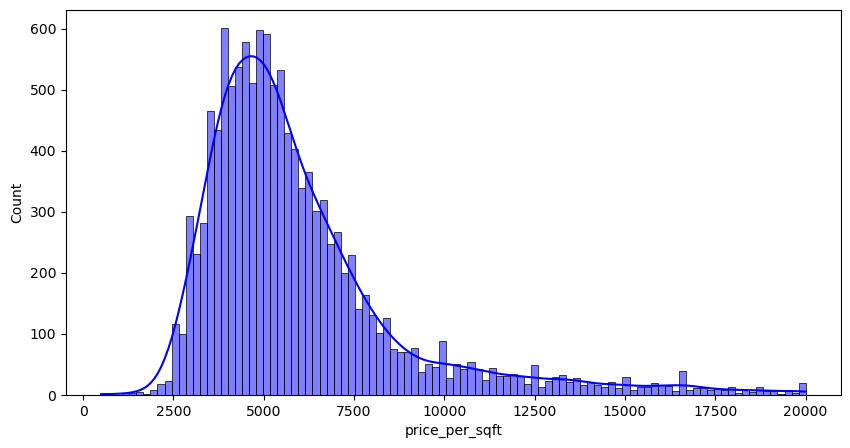

In [132]:
sns.histplot(housing_clean["price_per_sqft"], kde=True, bins=100, color='blue', edgecolor='black')

<Axes: xlabel='price', ylabel='Count'>

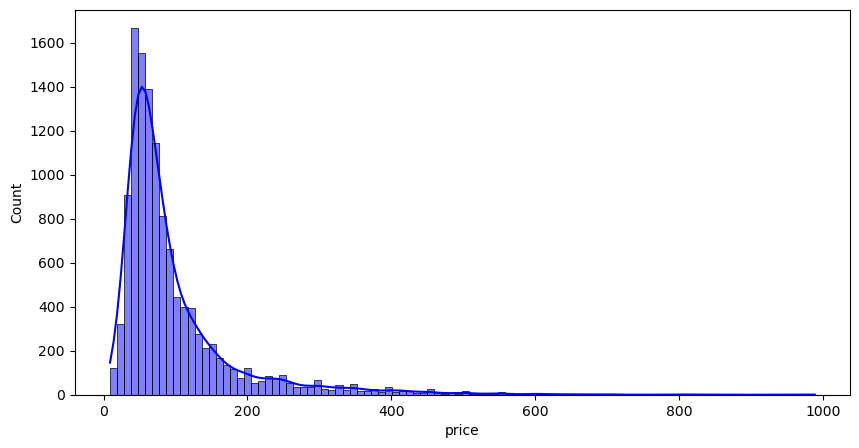

In [133]:
sns.histplot(housing_clean["price"], kde=True, bins=100, color='blue', edgecolor='black')

In [134]:
housing_clean.shape

(12210, 10)

In [135]:
# chưa hiểu lắm
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [136]:
housing_clean = remove_bhk_outliers(housing_clean)

In [137]:
housing_clean = housing_clean[housing_clean.bath < housing_clean.bhk+2]
housing_clean.head()

,area_type,availability,location,bath,balcony,price,bhk,sqft,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,2,1,39.07,2,1056.0,3699.810606,528.0
2,Built-up Area,Ready To Move,Uttarahalli,2,3,62.00,3,1440.0,4305.555556,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1,95.00,3,1521.0,6245.890861,507.0
4,Super built-up Area,Ready To Move,Kothanur,2,1,51.00,2,1200.0,4250.000000,600.0
6,Super built-up Area,Soon to be Vacated,Old Airport Road,4,4,204.00,4,2732.0,7467.057101,683.0


##### Dropping feature based on correlation

In [138]:
numeric_cols = housing_clean.select_dtypes(include=[np.number])  # Chỉ lấy các cột số
numeric_cols.corr()['price'].sort_values(ascending=False)

price             1.000000
sqft              0.820807
price_per_sqft    0.782903
bath              0.650978
bhk               0.634278
sqft_per_bhk      0.470972
balcony           0.294060
Name: price, dtype: float64

In [139]:
housing_clean.head()

,area_type,availability,location,bath,balcony,price,bhk,sqft,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,2,1,39.07,2,1056.0,3699.810606,528.0
2,Built-up Area,Ready To Move,Uttarahalli,2,3,62.00,3,1440.0,4305.555556,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1,95.00,3,1521.0,6245.890861,507.0
4,Super built-up Area,Ready To Move,Kothanur,2,1,51.00,2,1200.0,4250.000000,600.0
6,Super built-up Area,Soon to be Vacated,Old Airport Road,4,4,204.00,4,2732.0,7467.057101,683.0


In [141]:
# có hệ số tương quan thấp so với price nên drop
housing_clean.drop(["price_per_sqft"], axis = 1, inplace = True)

KeyError: "['price_per_sqft'] not found in axis"

In [142]:
housing_clean.drop(["sqft_per_bhk"], axis = 1, inplace = True)
housing_clean.drop(["balcony"], axis = 1, inplace = True)

In [143]:
# giữ lại cột price
price = housing_clean["price"]
housing_clean.drop(["price"], axis = 1, inplace = True)

In [156]:
housing_clean = housing_clean[["sqft", "bhk", "bath", "availability", "area_type", "location"]]

##### Handling Categorical Features

In [157]:
# mã hoá dữ liệu phân loại
# tạo đối tượng 
le1 = LabelEncoder()
# mã hoá dữ liệu phân loại từ cột thứu 4 của df housing_clean => lưu kết quả vào housing _availability
housing_availability = le1.fit_transform(housing_clean.iloc[:,3])

In [158]:
le2 = LabelEncoder()
housing_area_type = le2.fit_transform(housing_clean.iloc[:,4])

In [159]:
le3 = LabelEncoder()
housing_location = le3.fit_transform(housing_clean.iloc[:,5])

In [160]:
ohe1 = OneHotEncoder()
housing_availability = ohe1.fit_transform(housing_availability.reshape(-1,1))
housing_availability = pd.DataFrame(housing_availability.toarray(), columns=le1.classes_)

In [161]:
ohe2 = OneHotEncoder()
housing_area_type = ohe2.fit_transform(housing_area_type.reshape(-1,1))
housing_area_type = pd.DataFrame(housing_area_type.toarray(), columns=le2.classes_)

In [162]:
ohe3 = OneHotEncoder()
housing_location = ohe3.fit_transform(housing_location.reshape(-1,1))
housing_location = pd.DataFrame(housing_location.toarray(), columns=le3.classes_)

#### Preparing data for Model

In [163]:
housing_availability.drop([housing_availability.columns[len(housing_availability.columns)-1]], axis=1, inplace = True)
housing_area_type.drop([housing_area_type.columns[len(housing_area_type.columns)-1]], axis=1, inplace = True)
housing_location.drop([housing_location.columns[len(housing_location.columns)-1]], axis=1, inplace = True)

In [164]:
housing_num_features = housing_clean.iloc[:, 0:3].reset_index()
housing_num_features.drop(["index"], axis = 1, inplace = True)

In [165]:
std_scaler = StandardScaler()
housing_num_scaled_features = pd.DataFrame(std_scaler.fit_transform(housing_num_features), columns=housing_num_features.columns)

In [166]:
housing_for_model = pd.concat([housing_num_scaled_features, housing_availability, housing_area_type, housing_location], axis=1)

In [167]:
housing_for_model

,sqft,bhk,bath,Ready To Move,Built-up Area,Carpet Area,Plot Area,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Other,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,-0.607088,-0.567777,-0.483602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [9]:
X, y = housing_for_model.values, price.values
X_train, X_test, y_train, y_test = train_test_split(housing_for_model, price, test_size = 0.2, random_state = 42)

NameError: name 'housing_for_model' is not defined

#### Comparing Model Results

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

NameError: name 'X_train' is not defined

In [171]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.790199616649257

In [172]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.7621611341683487

In [173]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.7556036875915153

In [174]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.8069058543871263

In [175]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X_train, y_train)
ab_reg.score(X_test, y_test)

0.6546391340958677

In [176]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test, y_test)

0.5982616586072

In [6]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

NameError: name 'XGBRegressor' is not defined

In [4]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 500], 'max_depth': [2, 4, 6, 8], 
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300], 
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

#find_best_model_using_gridsearchcv(X, y)

NameError: name 'X' is not defined

In [5]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X, y)
xgb_reg.score(X, y)

NameError: name 'XGBRegressor' is not defined

In [180]:
import pickle
import json

In [181]:
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(xgb_reg,f)

In [182]:
cat_feature_columns = {
    'availability_columns' : [col for col in le1.classes_], 
    'area_columns' : [col for col in le2.classes_],
    'location_columns' : [col for col in le3.classes_]
}

with open("columns.json","w") as f:
    f.write(json.dumps(cat_feature_columns))